# Four peaks

## Setup

In [2]:
import mlrose_hiive
import time
import pandas as pd

In [3]:
def run_algorithm(lengths, fitness):
    RHC_results = []
    GA_results = []
    SA_results = []
    MIMIC_results = []

    for length in lengths:
        problem = mlrose_hiive.DiscreteOpt(length = length, fitness_fn = fitness, maximize = True, max_val = 2)
        start_time=time.time()
        _, _, curve_rch = mlrose_hiive.random_hill_climb(problem, max_attempts = 10, max_iters = 10000, init_state = None, curve = True)
        end_time = time.time()
        total_time = end_time - start_time
        print("RHC:", total_time, length)
        RHC_results.append([length, total_time, curve_rch[-1, 0], curve_rch[-1, -1], curve_rch[-1, 1] / total_time])

        start_time=time.time()
        _, _, curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.GeomDecay(), max_attempts = 10, max_iters = 10000, init_state = None, curve = True)
        end_time = time.time()
        total_time = end_time - start_time
        print("SA:", total_time, length)
        SA_results.append([length, total_time, curve_sa[-1, 0], curve_sa[-1, -1], curve_sa[-1, 1] / total_time])

        start_time=time.time()
        _, _, curve_ga = mlrose_hiive.genetic_alg(problem, pop_size = 10 * length, mutation_prob = 0.5, max_attempts = 10, max_iters = 10 * length, curve=True)
        end_time = time.time()
        total_time = end_time - start_time
        print("GA:", total_time, length)
        GA_results.append([length, total_time, curve_ga[-1, 0], curve_ga[-1, -1], curve_ga[-1, 1] / total_time])

        start_time=time.time()
        _, _, curve_mimic = mlrose_hiive.mimic(problem, pop_size = 10 * length, max_attempts = 10, max_iters = 10 * length, curve = True)
        end_time = time.time()
        total_time = end_time - start_time
        print("MIMIC:", total_time, length)
        MIMIC_results.append([length, total_time, curve_mimic[-1, 0], curve_mimic[-1, -1], curve_mimic[-1, 1] / total_time])

    return RHC_results, GA_results, SA_results, MIMIC_results, curve_rch, curve_ga, curve_sa, curve_mimic

In [18]:
def draw_graphs(lengths, RHC_results, GA_results, SA_results, MIMIC_results, curve_rch, curve_ga, curve_sa, curve_mimic):
    labels = ["Time","Fitness","Evaluations"]
    titles = ["Time vs Problem Size","Fitness vs Problem Size","Function Evaluations vs Problem Size"]
    for i in range(1,4):
        RHC_df = pd.DataFrame(RHC_results)[i]
        GA_df = pd.DataFrame(GA_results)[i]
        SA_df = pd.DataFrame(SA_results)[i]
        MIMIC_df = pd.DataFrame(MIMIC_results)[i]
        df = pd.concat([RHC_df, GA_df, SA_df, MIMIC_df], ignore_index=True, axis=1)
        df.index=lengths
        df.columns = ["RHC", "GA", "SA", "MIMIC"]
        df.plot(marker='o',xlabel="Problem Size", ylabel=labels[i - 1], title=titles[i - 1], figsize=(12,6))

    RHC_df = pd.DataFrame(curve_rch[:,0])
    GA_df = pd.DataFrame(curve_ga[:,0])
    SA_df = pd.DataFrame(curve_sa[:500,0])
    MIMIC_df = pd.DataFrame(curve_mimic[:,0])
    df = pd.concat([RHC_df, GA_df, SA_df, MIMIC_df], ignore_index=True, axis=1)
    df.columns = ["RHC", "GA", "SA", "MIMIC"]
    df.plot(marker=".", xlabel="Iterations", ylabel="Fitness Value", title="Fitness Value vs Iterations", figsize=(12,6))

    

In [6]:
lengths = range(10,100,20)

four_peaks = mlrose_hiive.FourPeaks(t_pct = 0.1)
queens = mlrose_hiive.Queens()
edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
k_colors = mlrose_hiive.MaxKColor(edges)

In [7]:
f_rhc_results, f_ga_results, f_sa_results, f_mimic_results, f_curve_rch, f_curve_ga, f_curve_sa, f_curve_mimic = run_algorithm(lengths=lengths, fitness=four_peaks)
q_rhc_results, q_ga_results, q_sa_results, q_mimic_results, q_curve_rch, q_curve_ga, q_curve_sa, q_curve_mimic = run_algorithm(lengths=lengths, fitness=queens)
k_rhc_results, k_ga_results, k_sa_results, k_mimic_results, k_curve_rch, k_curve_ga, k_curve_sa, k_curve_mimic = run_algorithm(lengths=lengths, fitness=k_colors)

RHC: 0.0007431507110595703 10
SA: 0.00034880638122558594 10
GA: 0.026766061782836914 10
MIMIC: 0.15196895599365234 10
RHC: 5.698204040527344e-05 30
SA: 0.0012238025665283203 30
GA: 0.1599717140197754 30
MIMIC: 3.24013090133667 30
RHC: 8.106231689453125e-05 50
SA: 0.006574153900146484 50
GA: 0.5311391353607178 50
MIMIC: 10.887994050979614 50
RHC: 7.724761962890625e-05 70
SA: 0.012382030487060547 70
GA: 1.1159701347351074 70
MIMIC: 22.718858003616333 70
RHC: 7.510185241699219e-05 90
SA: 0.015147686004638672 90
GA: 2.3448121547698975 90
MIMIC: 63.77147197723389 90
RHC: 0.0022399425506591797 10
SA: 0.01805281639099121 10
GA: 0.10112404823303223 10
MIMIC: 0.2344350814819336 10
RHC: 0.00344085693359375 30
SA: 0.023702144622802734 30
GA: 1.0750811100006104 30
MIMIC: 2.8953421115875244 30
RHC: 0.0197601318359375 50
SA: 0.06811904907226562 50
GA: 5.0530760288238525 50
MIMIC: 9.192750930786133 50
RHC: 0.012296915054321289 70
SA: 0.15355205535888672 70
GA: 4.0161871910095215 70
MIMIC: 19.56805610

## Four Peaks

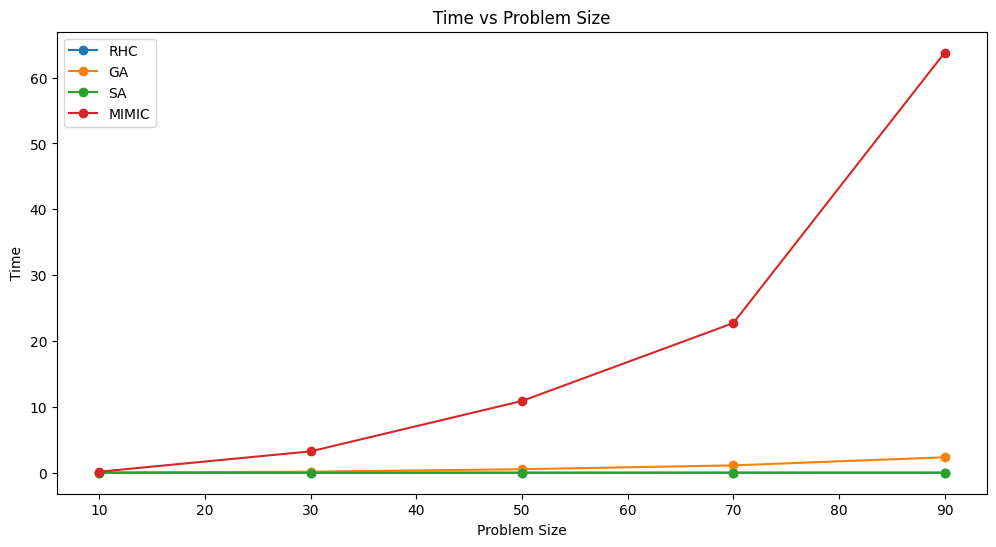

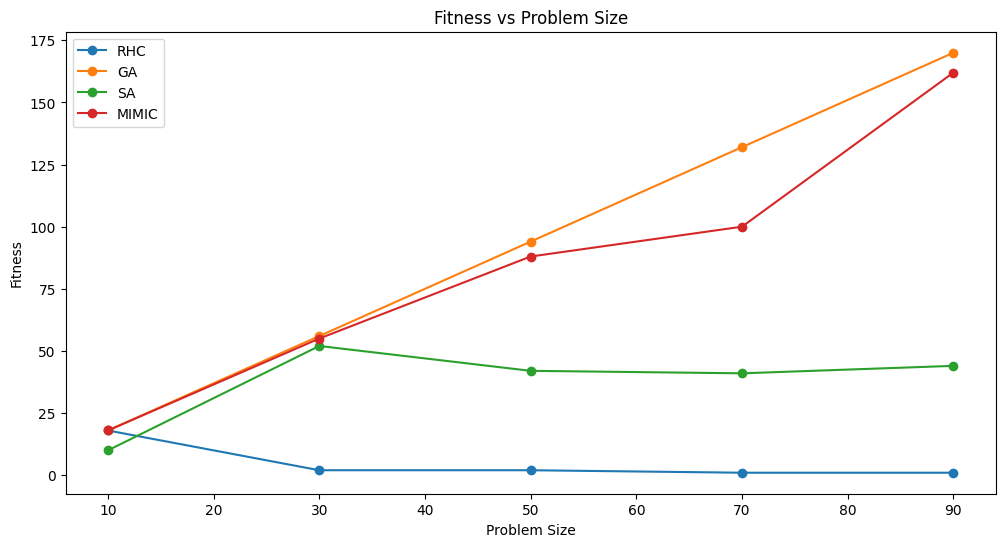

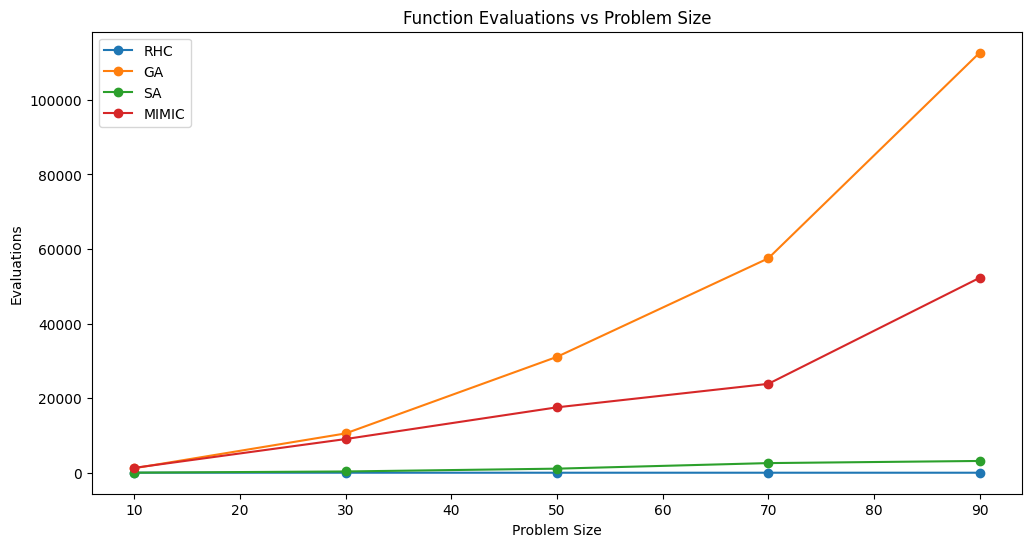

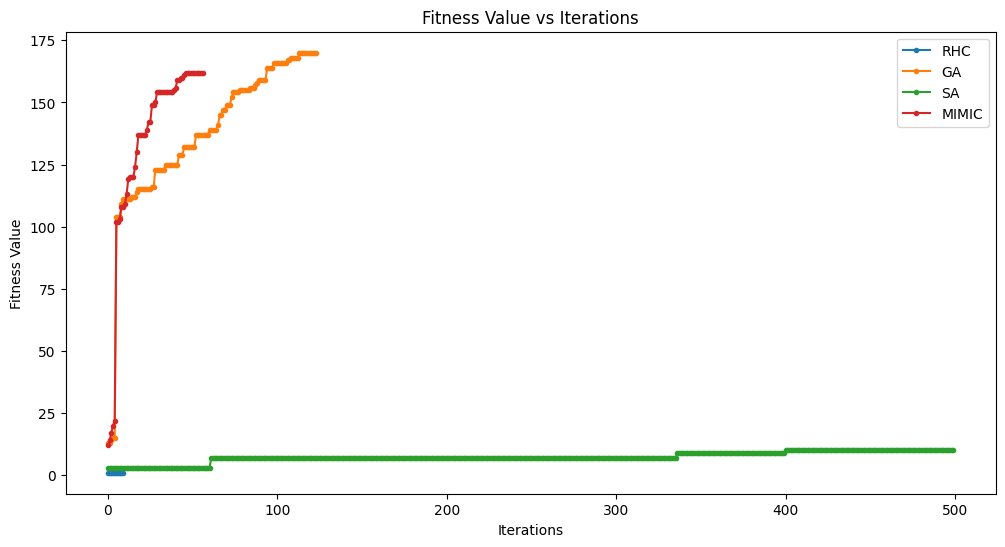

In [19]:
draw_graphs(lengths=lengths, RHC_results=f_rhc_results, GA_results=f_ga_results, SA_results=f_sa_results, MIMIC_results=f_mimic_results, curve_rch=f_curve_rch, curve_ga=f_curve_ga, curve_sa=f_curve_sa, curve_mimic=f_curve_mimic)

## Queens

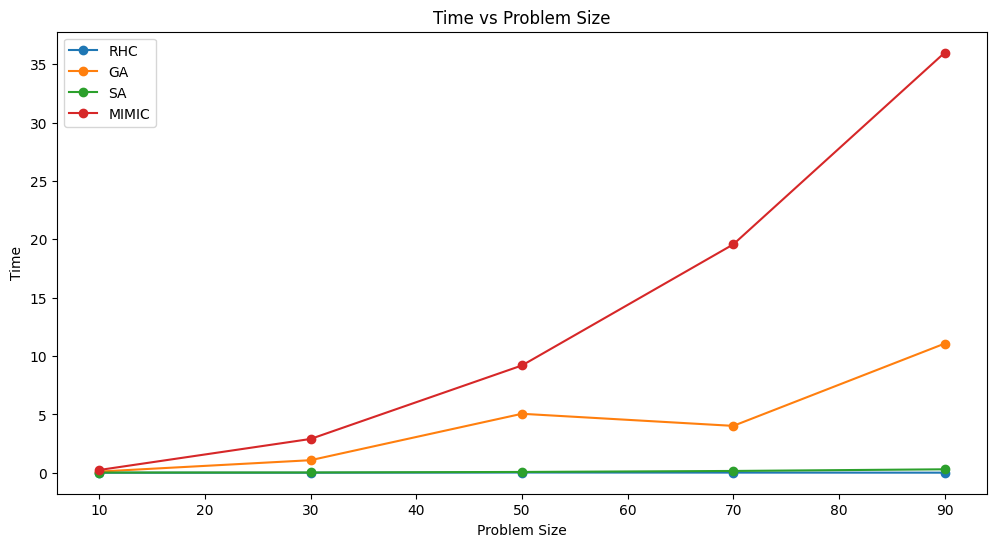

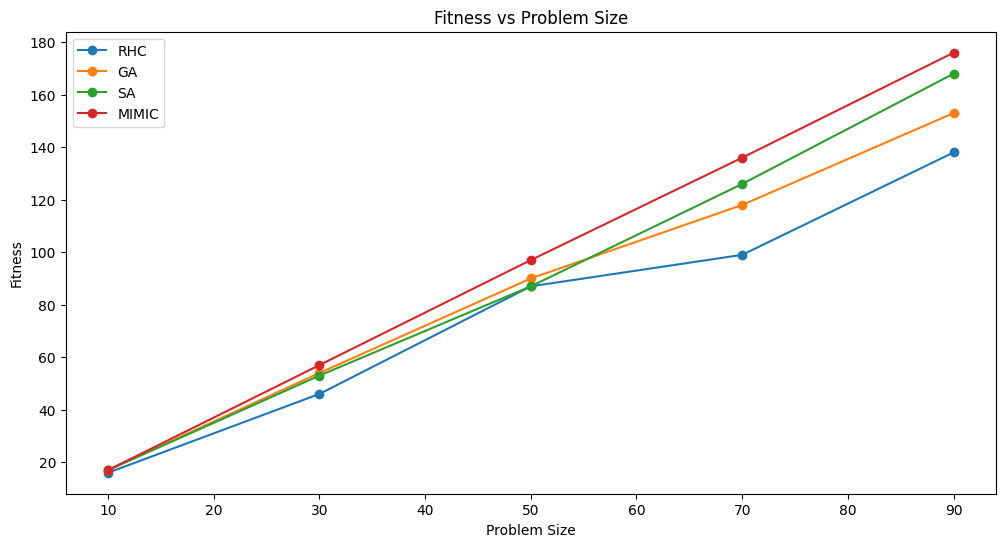

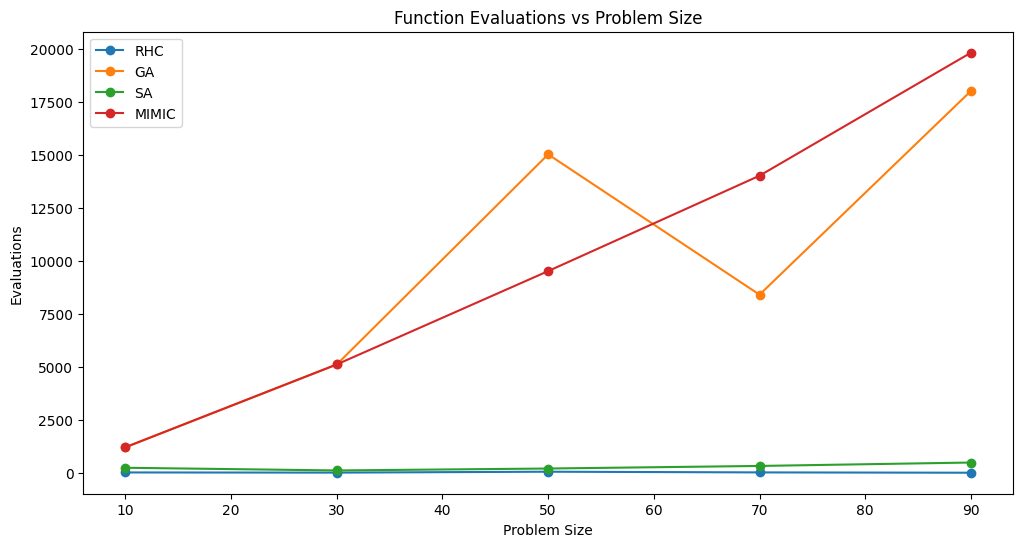

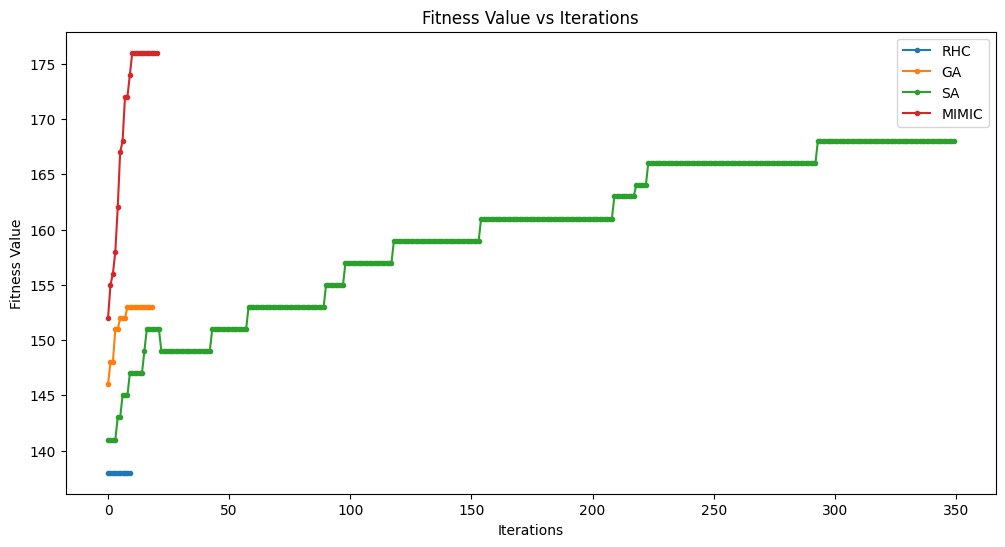

In [20]:
draw_graphs(lengths=lengths, RHC_results=q_rhc_results, GA_results=q_ga_results, SA_results=q_sa_results, MIMIC_results=q_mimic_results, curve_rch=q_curve_rch, curve_ga=q_curve_ga, curve_sa=q_curve_sa, curve_mimic=q_curve_mimic)

## K color

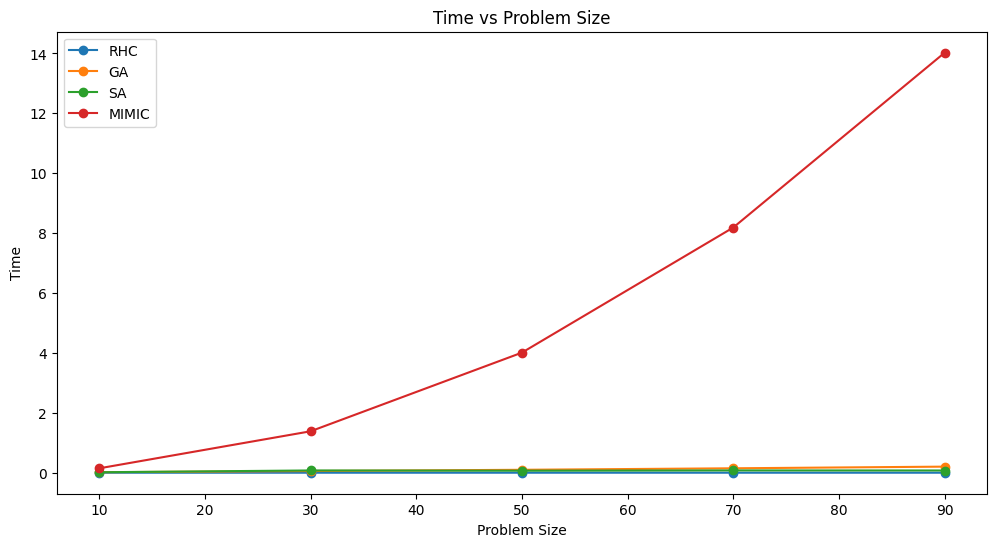

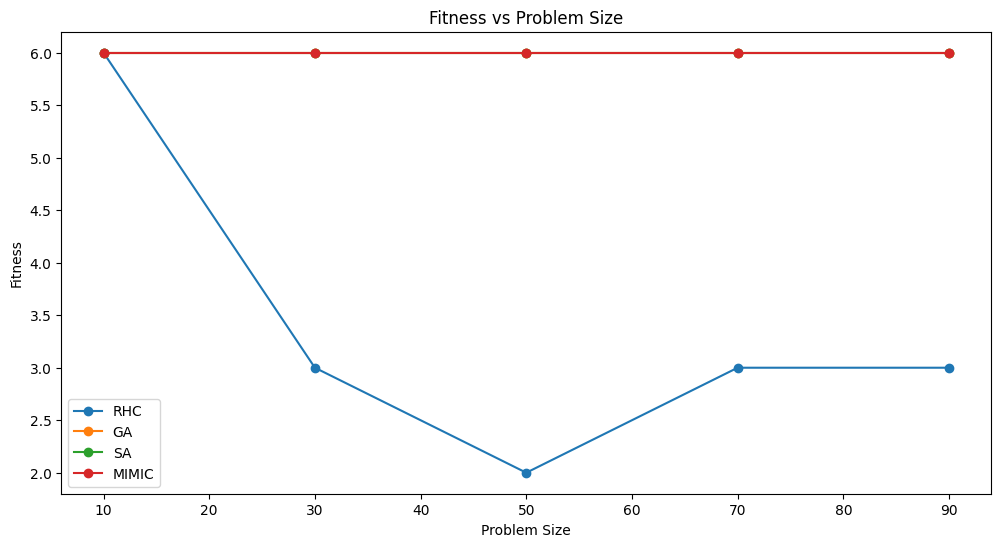

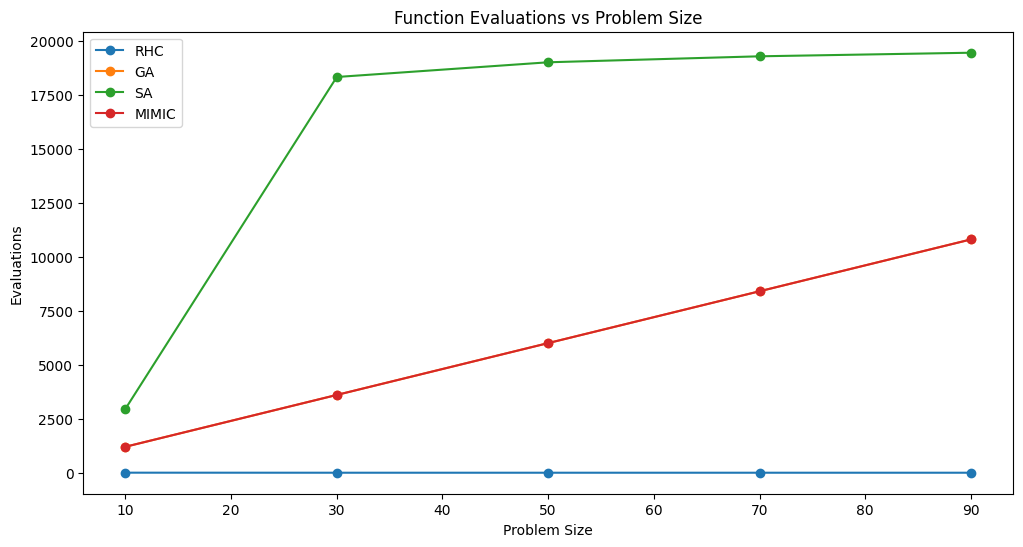

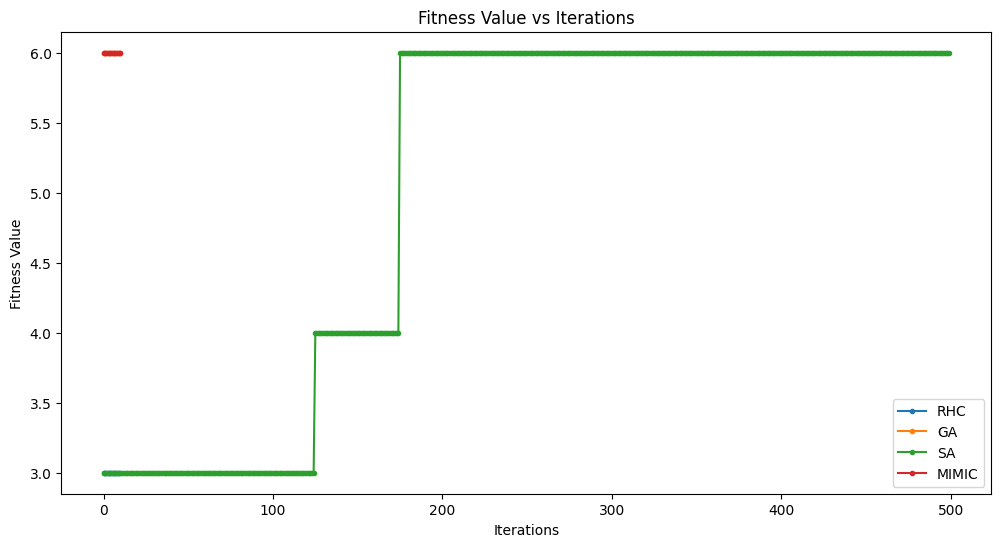

In [21]:
draw_graphs(lengths=lengths, RHC_results=k_rhc_results, GA_results=k_ga_results, SA_results=k_sa_results, MIMIC_results=k_mimic_results, curve_rch=k_curve_rch, curve_ga=k_curve_ga, curve_sa=k_curve_sa, curve_mimic=k_curve_mimic)

# Most Streamed Spotify Songs 2023: Predicting hits (number of streams per month)

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('./data/card_transdata_part.csv', encoding = 'latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              50000 non-null  float64
 1   distance_from_last_transaction  50000 non-null  float64
 2   ratio_to_median_purchase_price  50000 non-null  float64
 3   repeat_retailer                 50000 non-null  float64
 4   used_chip                       50000 non-null  float64
 5   used_pin_number                 50000 non-null  float64
 6   online_order                    50000 non-null  float64
 7   fraud                           50000 non-null  float64
dtypes: float64(8)
memory usage: 3.1 MB


In [90]:
pd.set_option('display.max_columns', None)
if df.isnull().values.any():
    print("Warning: Missing Data")
df.describe(include='all')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,26.979933,5.164165,1.799510,0.885020,0.350680,0.103280,0.650880,0.086340
std,68.502716,26.713719,2.689812,0.319001,0.477188,0.304327,0.476697,0.280868
min,0.021322,0.000705,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.905343,0.296871,0.474524,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.047077,0.997287,0.993814,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.970365,3.367123,2.075260,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,2160.499922,67.601896,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
df['fraud'].value_counts()

fraud
0.0    45683
1.0     4317
Name: count, dtype: int64

## Models

In [92]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [93]:
X = df.drop('fraud', axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100500)

In [94]:
learning_rates = [0.1, 0.2, 0.5, 0.7, 1]
hidden_nodes = [10, 20, 100, 200, 350, 500]

In [95]:
def run_nn(learning_rates, hidden_nodes, X_train, X_test, y_train, y_test):
    random_state = 42
    RHC_score_train = []
    RHC_score_test = []
    RHC_loss = []
    SA_score_train = []
    SA_score_test = []
    SA_loss = []
    GA_score_train = []
    GA_score_test = []
    GA_loss = []

    for lr in learning_rates:
        print("RHC:", lr)
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = hidden_nodes, activation = 'relu', algorithm = 'random_hill_climb', max_iters = 1000, bias = True, is_classifier = True, learning_rate = lr, early_stopping = True, clip_max = 5, max_attempts = 10, random_state = random_state, restarts = 5)
        nn_model.fit(X_train, y_train)
        y_pred_train = nn_model.predict(X_train)
        y_pred_test = nn_model.predict(X_test)
        RHC_score_train.append(f1_score(y_train, y_pred_train, average='weighted'))
        RHC_score_test.append(f1_score(y_test, y_pred_test, average='weighted'))
        RHC_loss.append(nn_model.loss)

        del nn_model

        print("SA:", lr)
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = hidden_nodes, activation = 'relu', algorithm = 'simulated_annealing', max_iters = 1000, bias = True, is_classifier = True, learning_rate = lr, early_stopping = True, clip_max = 5, max_attempts = 10, random_state = random_state)
        nn_model.fit(X_train, y_train)
        y_pred_train = nn_model.predict(X_train)
        y_pred_test = nn_model.predict(X_test)
        SA_score_train.append(f1_score(y_train, y_pred_train, average='weighted'))
        SA_score_test.append(f1_score(y_test, y_pred_test, average='weighted'))
        SA_loss.append(nn_model.loss)

        del nn_model

        print("GA:", lr)
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = hidden_nodes, activation = 'relu', algorithm = 'genetic_alg', max_iters = 1000, bias = True, is_classifier = True, learning_rate = lr, early_stopping = True, clip_max = 5, max_attempts = 10, random_state = random_state)
        nn_model.fit(X_train, y_train)
        y_pred_train = nn_model.predict(X_train)
        y_pred_test = nn_model.predict(X_test)
        GA_score_train.append(f1_score(y_train, y_pred_train, average='weighted'))
        GA_score_test.append(f1_score(y_test, y_pred_test, average='weighted'))
        GA_loss.append(nn_model.loss)

        del nn_model

    return RHC_score_train, RHC_score_test, RHC_loss, SA_score_train, SA_score_test, SA_loss, GA_score_train, GA_score_test, GA_loss

In [96]:
def show_model_results(learning_rate, f1_test, f1_train, xlabel, loss):
    plt.plot(learning_rate, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(learning_rate, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.xlabel(xlabel)
    plt.ylabel('Model F1 Score')

    plt.title('Results')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    loss=np.array(loss)

    plt.figure(figsize=(8, 6))
    sns.lineplot(x=learning_rate, y=loss[:,0])
    plt.title('learning rate vs Test Accuracy ')
    plt.xlabel('learning rate')
    plt.ylabel('Test Accuracy')
    plt.show()


    plt.figure(figsize=(8, 6))
    sns.lineplot(x=learning_rate, y=loss[:,1])
    plt.title('learning rate vs  Loss ')
    plt.xlabel('learning rate')
    plt.ylabel('Loss')
    plt.show()

In [97]:
RHC_score_train, RHC_score_test, RHC_loss, SA_score_train, SA_score_test, SA_loss, GA_score_train, GA_score_test, GA_loss = run_nn(learning_rates=learning_rates, hidden_nodes=hidden_nodes, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

RHC: 0.1
SA: 0.1
GA: 0.1


KeyboardInterrupt: 

In [ ]:
show_model_results(learning_rate=learning_rates, f1_test=RHC_score_test, f1_train=RHC_score_train, xlabel="RHC", loss=RHC_loss)

In [ ]:
show_model_results(learning_rate=learning_rates, f1_test=SA_score_test, f1_train=SA_score_train, xlabel="SA", loss=SA_loss)

In [ ]:
show_model_results(learning_rate=learning_rates, f1_test=GA_score_test, f1_train=GA_score_train, xlabel="GA", loss=GA_loss)